In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\PC-Udaya\Downloads\ipl.csv")

### 1.Data Understanding

Project Overview:
This project aims to predict the total score of a cricket team at the end of their innings during an IPL (Indian Premier League) match. The model is built using historical data from IPL seasons 1 to 9 (2008-2016) and tested on data from season 10 (2017). The model uses various machine learning algorithms to predict the score based on input features such as the batting and bowling teams, overs, runs, wickets, and other match statistics.

In [5]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df.shape


(76014, 15)

In [7]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


Removing irrelevant columns

In [9]:
df.drop(columns = ['mid','venue','batsman','bowler','striker','non-striker'],inplace = True)

In [10]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [11]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### 2.Data Preprocessing


Data Cleaning

In [12]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:

df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [15]:
consistent_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders', 
                    'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals', 
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
data = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [16]:
data

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [17]:
data.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,53811.000000,53811.000000,53811.000000,53811.000000,53811.000000,53811.000000
mean,75.249559,2.406738,9.772972,33.427905,1.118043,161.733493
std,49.303939,2.011816,5.773907,15.049807,1.052852,30.009152
min,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,34.000000,1.000000,4.600000,25.000000,0.000000,142.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,163.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,183.000000
max,246.000000,10.000000,19.600000,94.000000,7.000000,246.000000


Data from the first 5 overs of each match is removed to focus on more relevant match situations

In [18]:
data = data[data['overs'] >= 5.0]

In [19]:
data.shape

(40108, 9)

The 'date' column is converted from string format to a datetime object for easier analysis.

In [20]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\PC-Udaya\AppData\Local\Temp\ipykernel_16908\736794659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [18]:
data.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [21]:
numerical_data = data.select_dtypes(include=np.number)

In [22]:
numerical_data

,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,61,0,5.1,59,0,222
33,61,1,5.2,59,1,222
34,61,1,5.3,59,1,222
35,61,1,5.4,59,1,222
36,61,1,5.5,58,1,222
...,...,...,...,...,...,...
75884,106,9,18.1,29,4,107
75885,107,9,18.2,29,4,107
75886,107,9,18.3,28,4,107
75887,107,9,18.4,24,4,107


In [23]:
num_cols = numerical_data.columns

In [24]:
correlation = numerical_data.corr()

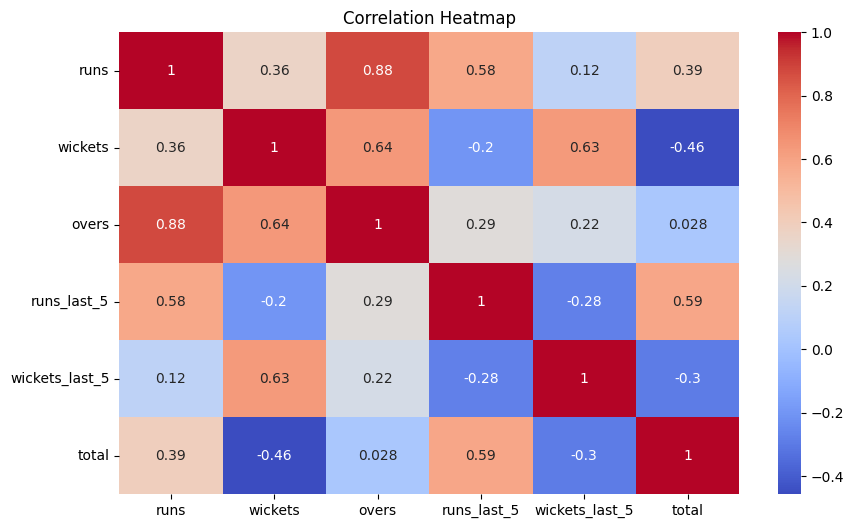

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Conveting categorical data through OneHotEncoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder = OneHotEncoder(sparse_output = False,drop ='first')

In [27]:
encoded = encoder.fit_transform(data[['bat_team', 'bowl_team']])

In [28]:
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['bat_team', 'bowl_team']))

In [29]:
# Reset index before concatenation
data = data.reset_index(drop=True)
encoded= encoded.reset_index(drop=True)

# Concatenate again
data= pd.concat([data, encoded], axis=1)

In [30]:
data.tail()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
40103,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40104,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40105,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40106,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40107,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
print(data.columns)
print(encoded.columns)

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')
Index(['bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_

In [32]:
data = data.drop(['bat_team', 'bowl_team'], axis=1)

### Outliers

 In this ipl data different numerical columns will naturally have different value ranges.
 Wickets will generally be low (max 10), while runs can be much higher, making traditional outlier.
 So, i used median to cover some outliers of numerical_data.

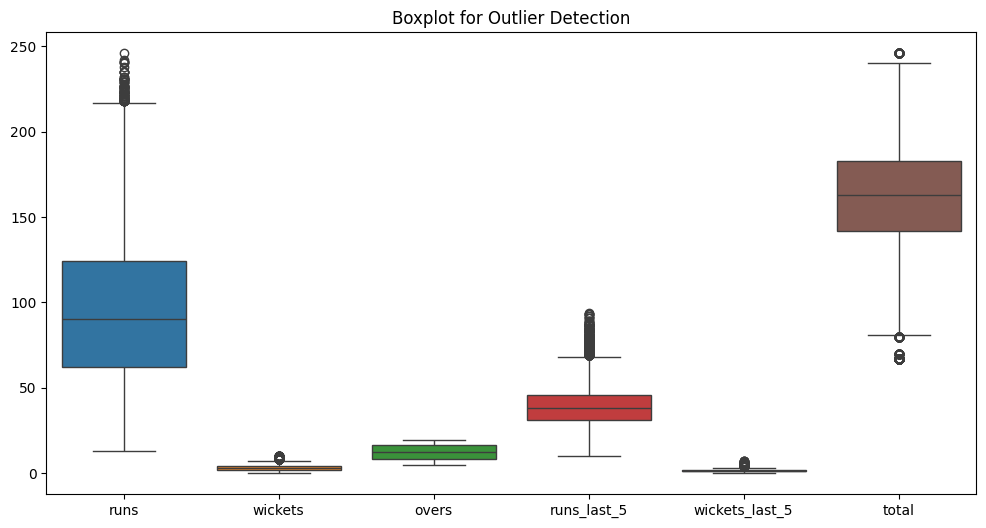

In [33]:
# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [34]:
#Compute Q1 and Q3
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Show outlier rows
outlier_rows = numerical_data[outliers]
print("Outliers detected:", outlier_rows)


Outliers detected:        runs  wickets  overs  runs_last_5  wickets_last_5  total
118     206        3   19.1           71               1    222
119     212        3   19.2           71               1    222
120     214        3   19.3           69               1    222
123     222        3   19.6           68               1    222
218     167        4   15.1           70               1    240
...     ...      ...    ...          ...             ...    ...
75884   106        9   18.1           29               4    107
75885   107        9   18.2           29               4    107
75886   107        9   18.3           28               4    107
75887   107        9   18.4           24               4    107
75888   107       10   18.5           23               5    107

[2702 rows x 6 columns]


In [35]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [36]:
# If any missing values i an just Replacing missing numericalvalues with medians

In [37]:
# Replace outliers with median values
for col in num_cols:
    median_value = numerical_data[col].median()
    
    # Replace values below lower bound
    for i in range(len(data)):
        if data[col][i] < lower_bound[col]:
            data.at[i, col] = median_value
        
        # Replace values above upper bound
        if data[col][i] > upper_bound[col]:
            data.at[i, col] = median_value

In [38]:
data.isnull().sum()

date                                     0
runs                                     0
wickets                                  0
overs                                    0
runs_last_5                              0
wickets_last_5                           0
total                                    0
bat_team_Delhi Daredevils                0
bat_team_Kings XI Punjab                 0
bat_team_Kolkata Knight Riders           0
bat_team_Mumbai Indians                  0
bat_team_Rajasthan Royals                0
bat_team_Royal Challengers Bangalore     0
bat_team_Sunrisers Hyderabad             0
bowl_team_Delhi Daredevils               0
bowl_team_Kings XI Punjab                0
bowl_team_Kolkata Knight Riders          0
bowl_team_Mumbai Indians                 0
bowl_team_Rajasthan Royals               0
bowl_team_Royal Challengers Bangalore    0
bowl_team_Sunrisers Hyderabad            0
dtype: int64

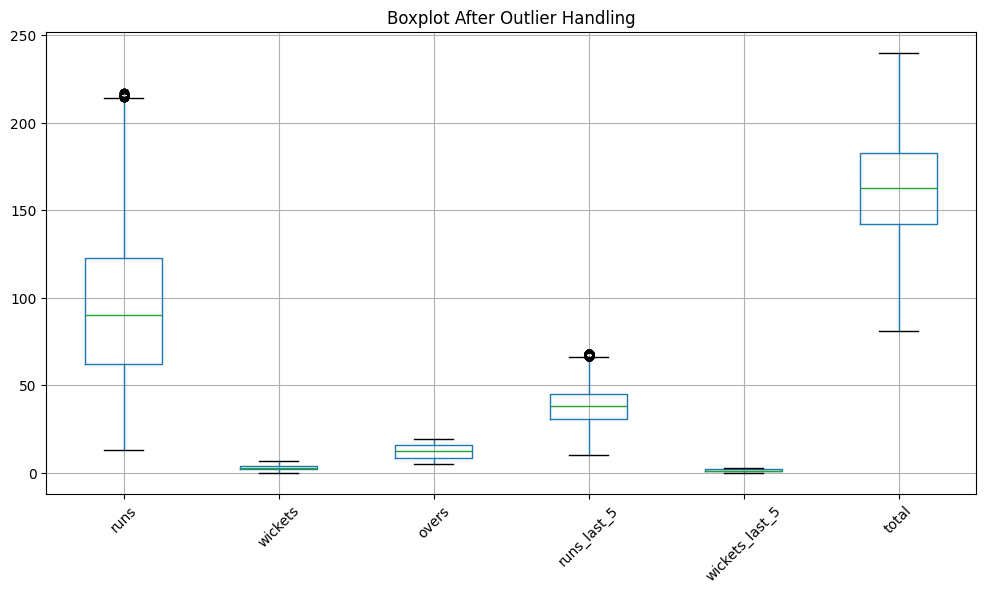

In [39]:
# Plot boxplot for each numerical column
data[num_cols].boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Handling")
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

Applying StandardScaler ensures that all numerical features are scaled consistently

In [41]:
scaler = StandardScaler()

In [42]:
data[num_cols] = scaler.fit_transform(data[num_cols])

Feature Selection

In [43]:
data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,-0.831276,-1.707286,-1.668644,1.924395,-1.329998,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2008-04-18,-0.831276,-1.120518,-1.645511,1.924395,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2008-04-18,-0.831276,-1.120518,-1.622379,1.924395,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2008-04-18,-0.831276,-1.120518,-1.599246,1.924395,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2008-04-18,-0.831276,-1.120518,-1.576114,1.831003,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
X = data.drop(['total'], axis=1)
y = data['total']

 ### Splitting Data into Training and Testing Sets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Training Data (Seasons 1-9, i.e., 2008-2016)
X_train = X[data['date'].dt.year <= 2016]
y_train = y[data['date'].dt.year <= 2016]

# Testing Data (Season 10, i.e., 2017)
X_test = X[data['date'].dt.year == 2017]
y_test = y[data['date'].dt.year == 2017]

# Check dataset shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (37330, 20)
Testing Data Shape: (2778, 20)


In [47]:
X_train

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,-0.831276,-1.707286,-1.668644,1.924395,-1.329998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2008-04-18,-0.831276,-1.120518,-1.645511,1.924395,-0.226422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2008-04-18,-0.831276,-1.120518,-1.622379,1.924395,-0.226422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2008-04-18,-0.831276,-1.120518,-1.599246,1.924395,-0.226422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2008-04-18,-0.831276,-1.120518,-1.576114,1.831003,-0.226422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37325,2016-05-29,2.450244,2.400090,1.593020,1.457435,-0.226422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37326,2016-05-29,2.598283,2.400090,1.616152,1.644219,-0.226422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37327,2016-05-29,2.622956,2.400090,1.639285,1.644219,-0.226422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37328,2016-05-29,2.647629,2.400090,1.662417,1.737611,-0.226422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
#drop date column
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)

### linearRegression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred_lr = lin_reg.predict(X_test)

The result (y_pred_lr) is a NumPy array containing predicted scores for each entry in X_test.

In [53]:
y_pred_lr

array([ 0.37566932,  0.49645985,  0.46560548, ..., -0.99233066,
       -1.03310702, -1.05900038])

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

I have used MAE, MSE, and RMSE to evaluate your Linear Regression model's error

In [55]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression MAE: 0.45698919798105797
Linear Regression MSE: 0.389957147118762
Linear Regression RMSE: 0.6244654891335165


MAE (0.4569) is relatively low, meaning predictions are generally close to actual match scores.
RMSE (0.6244) suggests slight variations in predictions, but if match scores typically range in the 100-200 runs range, this error is quite minimal.
Lower MSE indicates less variance.

### Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
# Train Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predict
y_pred_tree = tree_reg.predict(X_test)

# Evaluate
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print(f"Decision Tree Regression MAE: {mae_tree}")
print(f"Decision Tree Regression MSE: {mse_tree}")
print(f"Decision Tree Regression RMSE: {rmse_tree}")


Decision Tree Regression MAE: 0.6054294214176646
Decision Tree Regression MSE: 0.6957533631452602
Decision Tree Regression RMSE: 0.8341183148362468


### Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [59]:
# Train Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Regression MAE: {mae_rf}")
print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Random Forest Regression RMSE: {rmse_rf}")

Random Forest Regression MAE: 0.504507046948415
Random Forest Regression MSE: 0.4571431337007415
Random Forest Regression RMSE: 0.6761236083000959


### AdaBoost with Linear Regression

In [60]:
# Train AdaBoost Regressor with Linear Regression as base learner
adaboost_reg = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)
adaboost_reg.fit(X_train, y_train)

# Predict
y_pred_adaboost = adaboost_reg.predict(X_test)

# Evaluate
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)

print(f"AdaBoost Regression MAE: {mae_adaboost}")
print(f"AdaBoost Regression MSE: {mse_adaboost}")
print(f"AdaBoost Regression RMSE: {rmse_adaboost}")

AdaBoost Regression MAE: 0.5226411967803407
AdaBoost Regression MSE: 0.42707012436237973
AdaBoost Regression RMSE: 0.6535060247330393


In [61]:
# Compare models based on error metrics
error_metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "AdaBoost with LR"],
    "MAE": [mae_lr, mae_tree, mae_rf, mae_adaboost],
    "MSE": [mse_lr, mse_tree, mse_rf, mse_adaboost],
    "RMSE": [rmse_lr, rmse_tree, rmse_rf, rmse_adaboost]
})

print(error_metrics)

               Model       MAE       MSE      RMSE
0  Linear Regression  0.456989  0.389957  0.624465
1      Decision Tree  0.605429  0.695753  0.834118
2      Random Forest  0.504507  0.457143  0.676124
3   AdaBoost with LR  0.522641  0.427070  0.653506


Linear Regression performed best overall with the lowest errors.
Decision Tree had the worst performance, likely due to overfitting.
Random Forest and AdaBoost improved over Decision Tree, but still didn’t outperform Linear Regression.

Since Linear Regression performed best, the final model selection confirms its simplicity and effectiveness.

#### Predicting IPL Scores
The final model (Linear Regression) is used to predict.

In [62]:
data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,-0.831276,-1.707286,-1.668644,1.924395,-1.329998,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2008-04-18,-0.831276,-1.120518,-1.645511,1.924395,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2008-04-18,-0.831276,-1.120518,-1.622379,1.924395,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2008-04-18,-0.831276,-1.120518,-1.599246,1.924395,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2008-04-18,-0.831276,-1.120518,-1.576114,1.831003,-0.226422,2.087803,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_last_5, wickets_last_5, model, X_train):
    # Create input dataframe with one-hot encoded teams
    input_data = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=X_train.columns)

    # Assign provided values
    input_data['overs'] = overs
    input_data['runs'] = runs
    input_data['wickets'] = wickets
    input_data['runs_last_5'] = runs_last_5
    input_data['wickets_last_5'] = wickets_last_5

    # Encode batting and bowling teams
    if f'bat_team_{batting_team}' in input_data.columns:
        input_data[f'bat_team_{batting_team}'] = 1
    if f'bowl_team_{bowling_team}' in input_data.columns:
        input_data[f'bowl_team_{bowling_team}'] = 1

    # Ensure correct feature order
    input_data = input_data[X_train.columns]

    # Predict score
    predicted_score = model.predict(input_data.values.reshape(1, -1))[0]
    return round(predicted_score)

In [64]:
example_matches = [
    ('Kolkata Knight Riders', 'Delhi Daredevils', 20, 120, 5, 50, 2),
    ('Sunrisers Hyderabad', 'Royal Challengers Bangalore', 20, 105, 7, 45, 3),
    ('Mumbai Indians', 'Kings XI Punjab', 20, 135, 4, 60, 1),
    ('Rajasthan Royals', 'Chennai Super Kings', 20, 110, 6, 40, 3)
]

In [65]:
# Predict scores
for match in example_matches:
    predicted_score = predict_score(*match,lin_reg, X_train)
    print(f"Predicted Score for {match[0]} vs {match[1]}: {predicted_score}")

Predicted Score for Kolkata Knight Riders vs Delhi Daredevils: 131
Predicted Score for Sunrisers Hyderabad vs Royal Challengers Bangalore: 112
Predicted Score for Mumbai Indians vs Kings XI Punjab: 151
Predicted Score for Rajasthan Royals vs Chennai Super Kings: 118


C:\Users\PC-Udaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC-Udaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC-Udaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC-Udaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##  Conclusion: IPL Score Prediction using Machine Learning

The IPL score prediction project successfully builds a regression-based machine learning model to estimate the final score of a batting team based on multiple match-related features. The project involved data preprocessing, feature selection, encoding categorical variables, and training various regression models to identify the most suitable one for prediction.

## Key Findings:
- **Linear Regression** provided the most reliable predictions among the evaluated models, including Decision Tree, Random Forest, and AdaBoost regressors.
- **Feature Engineering** was crucial—selecting relevant match parameters such as runs, overs, wickets, and recent overs' performance significantly improved model accuracy.
- **One-Hot Encoding** effectively transformed categorical features like batting and bowling teams into numerical values, making them interpretable for the model.
- **Error Metrics** (MAE, MSE, RMSE) were used to compare model performances, and Linear Regression showed the lowest error values.
